In [208]:
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

# Definition of Lotka-Volterra System 
## Parameters:
- **$x_{0}=[5, 3]$**
- **$\theta = [2, 1, 4, 1]$**
- **$\theta=[\alpha, \beta, \gamma, \delta]$**
- **States: $x(t)=[S, W]$**

In [209]:
def lotka_volterra_system(state, t, alpha, beta, gamma, delta):
    s, w = state
    dsdt = alpha * s - beta * s * w
    dwdt = delta * s * w - gamma * w
    return [dsdt, dwdt]

In [210]:
alpha = 2
beta = 1
gamma = 4
delta = 1
initial_state = [5, 3]

## Time Points

In [211]:
t = np.linspace(0, 2, 200)
print(t.shape)

(200,)


## Solving the system

In [212]:
solution = odeint(lotka_volterra_system, initial_state, t, args=(alpha, beta, gamma, delta))
print(solution.shape)

(200, 2)


## Sampling Time Points

In [213]:
# t_sub = np.arange(0, 2, 0.2)
# index = np.int_((t_sub / 0.01))
# solution_sampling = solution[index]
# print(solution_sampling)
# De manera aleatoria
# rng = np.random.RandomState(1)
# training_index = rng.choice(np.arange(len(solution)), size=10, replace=False)
# t_train, y_train = t[training_index], solution[training_index]
# noise_std = 0.75
# y_train_noisy = y_train + rng.normal(loc=0.0, scale=noise_std, size=y_train.shape)
# # Con saltos de dt=0.2
t_sub = np.arange(0, 2, 0.2)
index = np.int_((t_sub / 0.01))  
y_train = solution[index]  
noise_std = 0.50
y_train_noisy = y_train + np.random.normal(loc=0.0, scale=noise_std, size=y_train.shape)  # Añadir ruido
print("Datos seleccionados (con ruido):", y_train_noisy)



Datos seleccionados (con ruido): [[5.41813916 3.37003254]
 [4.29710026 3.58263543]
 [3.50495059 3.22344857]
 [3.76659541 3.1136609 ]
 [1.69809946 2.40398279]
 [3.63518429 0.53253002]
 [3.37422176 1.18118981]
 [3.63389193 1.59194872]
 [4.8957671  1.95955716]
 [4.73449328 1.24864377]]


## Plotting

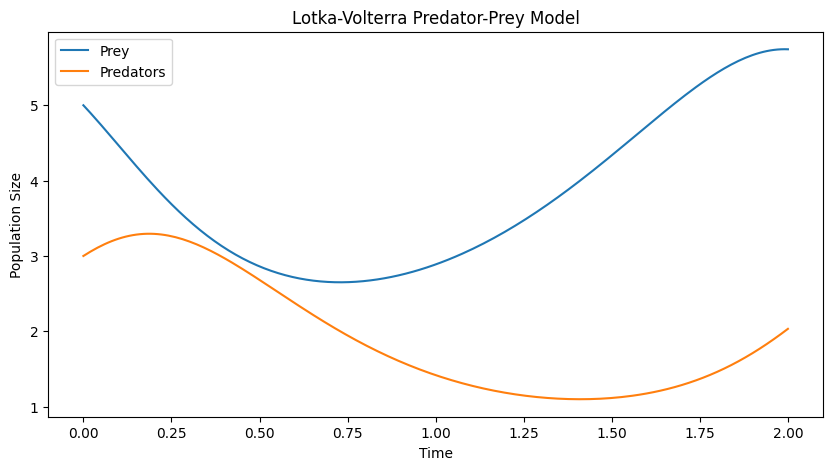

In [214]:
plt.figure(figsize=(10, 5))
plt.plot(t, solution[:, 0], label='Prey')
plt.plot(t, solution[:, 1], label='Predators')
plt.title('Lotka-Volterra Predator-Prey Model')
plt.xlabel('Time')
plt.ylabel('Population Size')
plt.legend()
plt.show()

## GP approach to inference solutions of LV System

In [215]:
T = t_train.reshape(-1, 1)
Y = y_train_noisy
print(T)

[[0.58291457]
 [0.40201005]
 [0.34170854]
 [1.02512563]
 [1.84924623]
 [1.98994975]
 [0.95477387]
 [0.04020101]
 [0.29145729]
 [1.68844221]]


In [216]:
kernel = RBF(length_scale_bounds=(1e-6, np.inf))

In [217]:
gp = GaussianProcessRegressor(kernel=kernel, alpha=noise_std**2)
print(gp)

GaussianProcessRegressor(alpha=0.25, kernel=RBF(length_scale=1))


In [218]:
gp.fit(T, Y)

GaussianProcessRegressor(alpha=0.25, kernel=RBF(length_scale=1))

In [219]:
Y_pred, sigma = gp.predict(t.reshape(-1, 1), return_std=True)
print(sigma)

[[0.26829952 0.26829952]
 [0.26564697 0.26564697]
 [0.26303088 0.26303088]
 [0.26045189 0.26045189]
 [0.25791063 0.25791063]
 [0.25540775 0.25540775]
 [0.25294385 0.25294385]
 [0.25051955 0.25051955]
 [0.24813546 0.24813546]
 [0.24579216 0.24579216]
 [0.24349024 0.24349024]
 [0.24123025 0.24123025]
 [0.23901275 0.23901275]
 [0.23683827 0.23683827]
 [0.23470732 0.23470732]
 [0.2326204  0.2326204 ]
 [0.23057799 0.23057799]
 [0.22858052 0.22858052]
 [0.22662844 0.22662844]
 [0.22472215 0.22472215]
 [0.22286201 0.22286201]
 [0.22104839 0.22104839]
 [0.2192816  0.2192816 ]
 [0.21756193 0.21756193]
 [0.21588962 0.21588962]
 [0.21426492 0.21426492]
 [0.21268799 0.21268799]
 [0.21115899 0.21115899]
 [0.20967803 0.20967803]
 [0.20824518 0.20824518]
 [0.20686049 0.20686049]
 [0.20552393 0.20552393]
 [0.20423547 0.20423547]
 [0.20299501 0.20299501]
 [0.20180242 0.20180242]
 [0.20065752 0.20065752]
 [0.19956009 0.19956009]
 [0.19850987 0.19850987]
 [0.19750654 0.19750654]
 [0.19654977 0.19654977]


Text(0.5, 1.0, 'GP for inferencing solutions of Lotka-Volterra System')

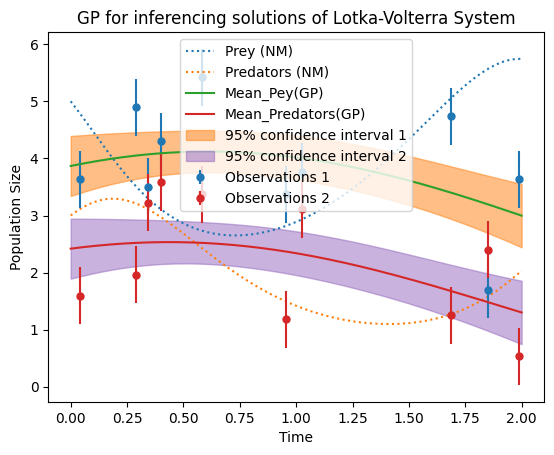

In [220]:
 plt.plot(t, solution, label=['Prey (NM)', 'Predators (NM)'], linestyle='dotted')
 plt.errorbar(t_train, y_train_noisy[:, 0], noise_std, linestyle='None', color='tab:blue', marker='.', markersize=10, label='Observations 1')
 plt.errorbar(t_train, y_train_noisy[:, 1], noise_std, linestyle='None', color='tab:red', marker='.', markersize=10, label='Observations 2')
 plt.plot(t, Y_pred, label=['Mean_Pey(GP)', 'Mean_Predators(GP)'])
 plt.fill_between(t.ravel(), Y_pred[:, 0] - 1.96 * sigma[:, 0], Y_pred[:, 0] + 1.96 * sigma[:, 0], color='tab:orange', alpha=0.5, label=r'95% confidence interval 1')
 plt.fill_between(t.ravel(), Y_pred[:, 1] - 1.96 * sigma[:, 1], Y_pred[:, 1] + 1.96 * sigma[:, 1], color='tab:purple', alpha=0.5, label=r'95% confidence interval 2')
 plt.legend()
 plt.xlabel("Time")
 plt.ylabel("Population Size")
 plt.title("GP for inferencing solutions of Lotka-Volterra System")

## Jaime Grafica

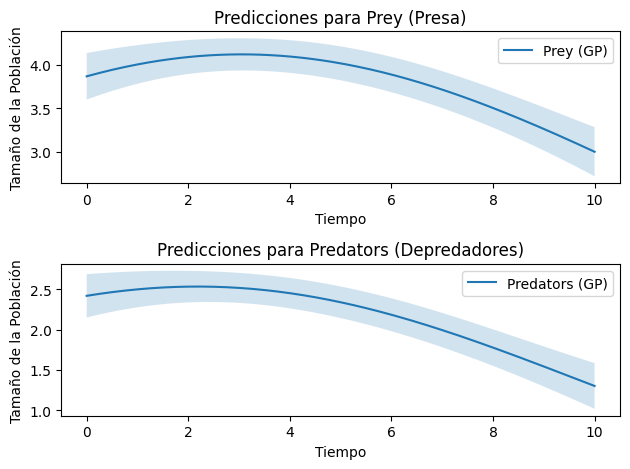

In [223]:
# Suponiendo que Y_pred y sigma están definidos y tienen una longitud de 200
# Redefinimos T para que tenga la misma longitud que Y_pred
T = np.linspace(0, 10, len(Y_pred))

# Subplot para 'prey'
plt.subplot(2, 1, 1)
plt.plot(T, Y_pred[:, 0], label='Prey (GP)')
plt.fill_between(T, Y_pred[:, 0] - sigma[:, 0], Y_pred[:, 0] + sigma[:, 0], alpha=0.2)
plt.title('Predicciones para Prey (Presa)')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.legend()

# Subplot para 'predators'
plt.subplot(2, 1, 2)
plt.plot(T, Y_pred[:, 1], label='Predators (GP)')
plt.fill_between(T, Y_pred[:, 1] - sigma[:, 1], Y_pred[:, 1] + sigma[:, 1], alpha=0.2)
plt.title('Predicciones para Predators (Depredadores)')
plt.xlabel('Tiempo')
plt.ylabel('Tamaño de la Población')
plt.legend()

plt.tight_layout()
plt.show()




In [222]:
 # plt.figure(figsize=(10, 5))
 # plt.plot(T, Y_pred, label=['Prey (GP)', 'Predators (GP)'])
 # plt.fill_between(T.ravel(), Y_pred[:, 0] - sigma[:, 0], Y_pred[:, 0] + sigma[:, 0], alpha=0.2)
 # plt.fill_between(T.ravel(), Y_pred[:, 1] - sigma[:, 1], Y_pred[:, 1] + sigma[:, 1], alpha=0.2)
 # plt.title('Predicciones del Modelo de Procesos Gaussianos para Lotka-Volterra')
 # plt.xlabel('Tiempo')
 # plt.ylabel('Tamaño de la Población')
 # plt.legend()
 # plt.show()